In [2]:
import numpy as np
import pandas as pd
import datetime

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [3]:
#print(items_frm.head(3))             # 아이템, 카테고리 라벨링
#print('---------')
#print(sample_submission_frm.head(3)) # 제출양식
#print(item_categories_frm.head(3))   # 카테고리 이름, 라벨링
#print(sales_train_frm.head(3))       #
#print(shops_frm.head(3))             # 상점 라벨링
#test_frm             # 

In [4]:
#제출 형식 예제
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission
#달 단위 결과

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [5]:
shops = pd.read_csv('data/shops.csv')
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [6]:
items = pd.read_csv('data/items.csv')
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [7]:
sales_train = pd.read_csv('data/sales_train.csv')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [8]:
print(type(sales_train.date[0]) , sales_train.date[0])
sales_train.info()

<class 'str'> 02.01.2013
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
#for i in range(len(sales_train)):
#    sales_train.date[i] = datetime.datetime.strptime(sales_train.date[i],'%d.%m.%Y')

In [10]:
sales_train.date=sales_train.date.apply(
    lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [11]:
print(type(sales_train.date[0]) , sales_train.date[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2013-01-02 00:00:00


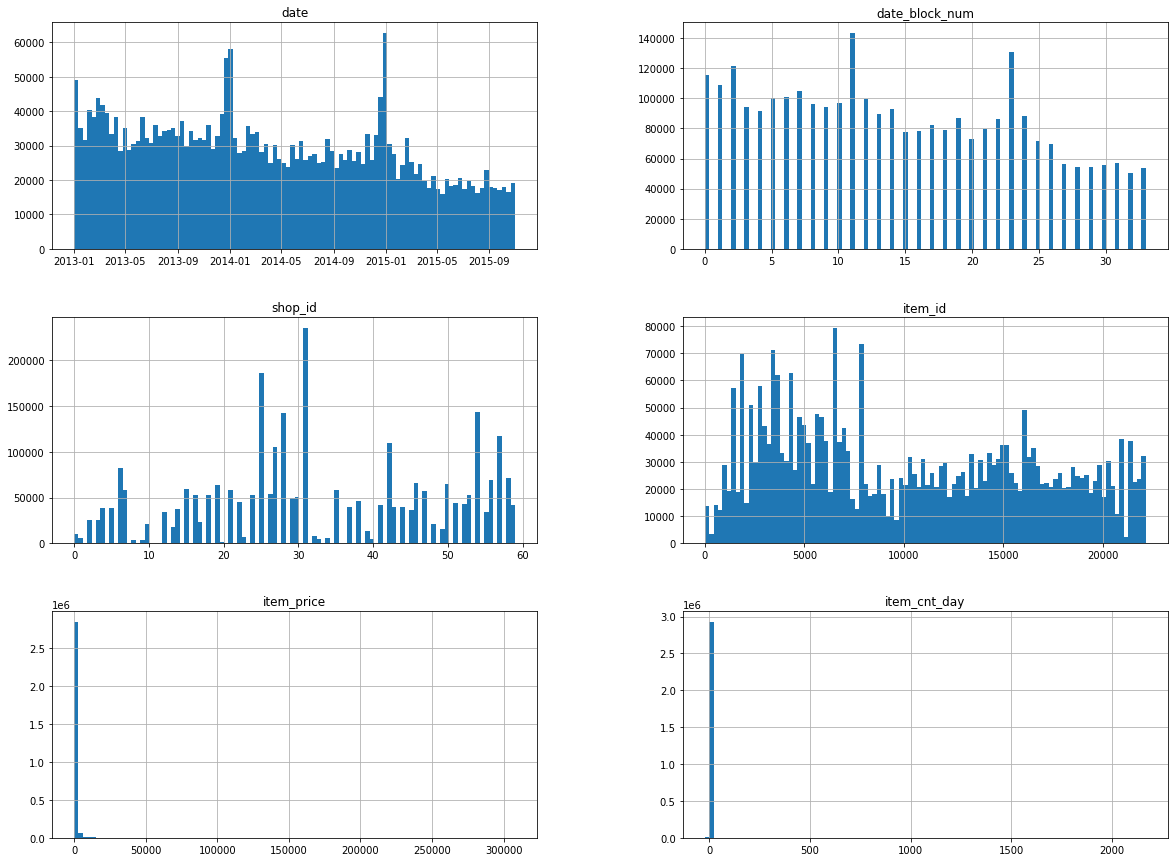

In [12]:
import matplotlib.pyplot as plt

sales_train.hist(bins = 100, figsize = (20,15))
plt.show()

In [13]:
pd.plotting.scatter_matrix(sales_train, figsize = (10,10))
plt.show()

KeyboardInterrupt: 

In [14]:
sales_train['price_hap'] = sales_train['item_price'] * sales_train['item_cnt_day']

In [15]:
daily_sales = sales_train.groupby('date', as_index=False)['price_hap'].sum()
store_daily_sales = sales_train.groupby(['shop_id', 'date'], as_index=False)['price_hap'].sum()
item_daily_sales = sales_train.groupby(['item_id', 'date'], as_index=False)['price_hap'].sum()

Text(0, 0.5, 'Sales')

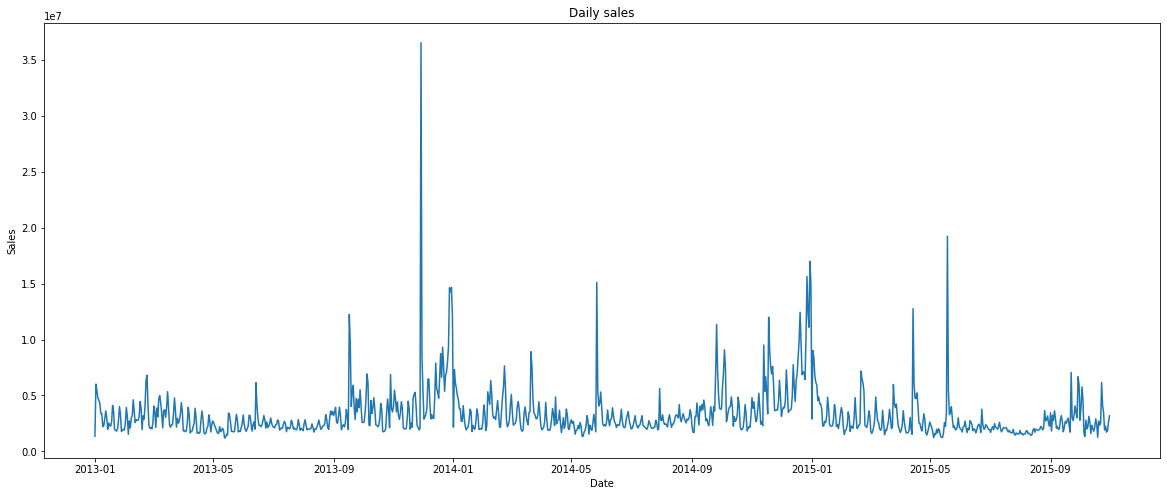

In [16]:
# 일별 총 판매량
plt.figure(figsize=(20,8))
plt.plot(daily_sales['date'],daily_sales['price_hap'])
plt.title('Daily sales')
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

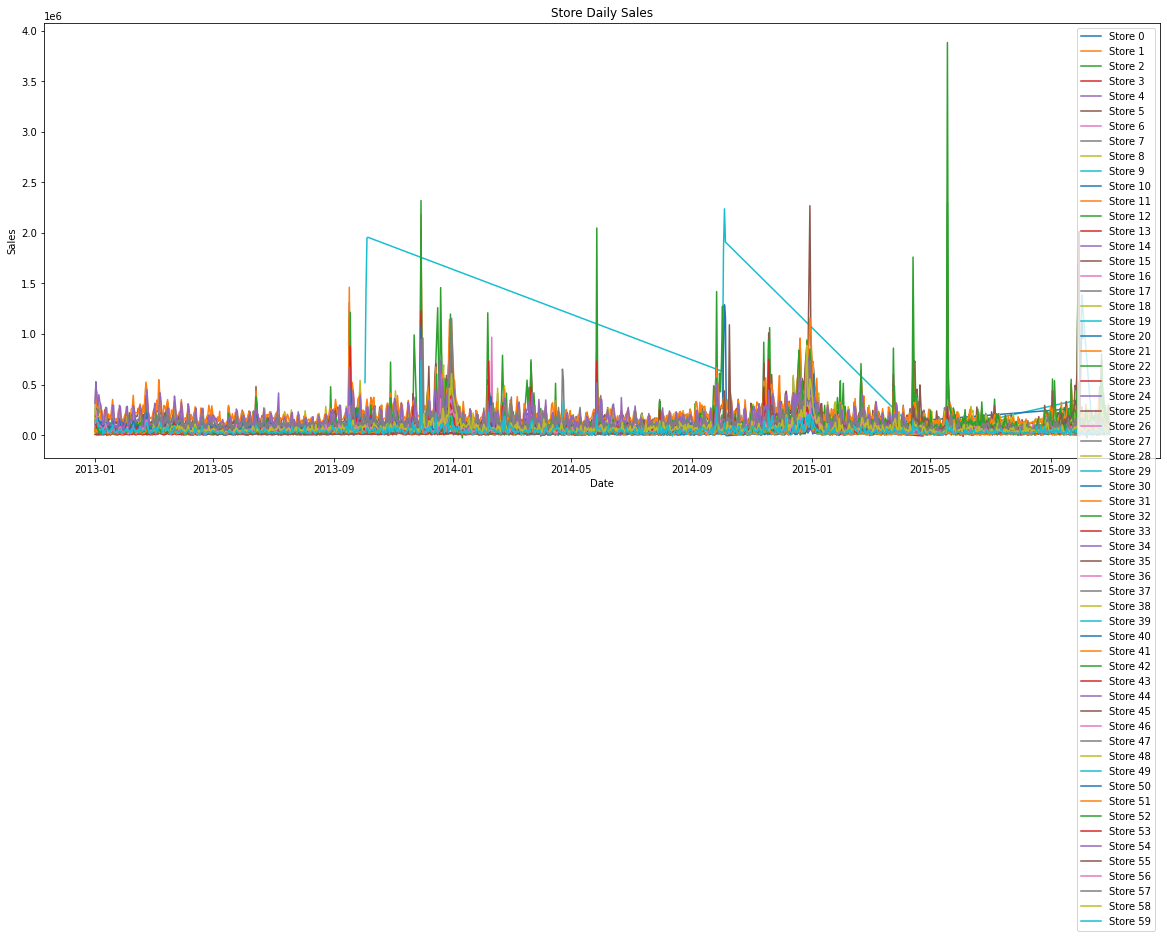

In [17]:
# 일별, Store별 총 판매량
plt.figure(figsize=(20,8))

for i in range(0,60) :
    temp = store_daily_sales[store_daily_sales.shop_id==i]
    plt.plot(temp['date'],temp['price_hap'], label = 'Store %d' % i)

plt.legend()
plt.title('Store Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

KeyboardInterrupt: 

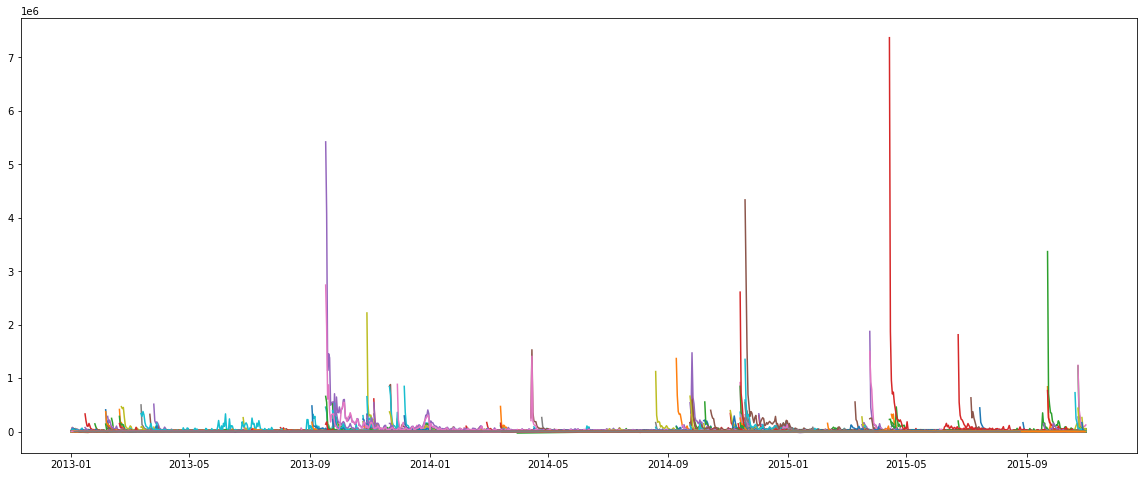

In [18]:
# 일별, Item별 총 판매량
plt.figure(figsize=(20,8))

for i in item_daily_sales.item_id.unique():
    temp = item_daily_sales[item_daily_sales.item_id==i]
    plt.plot(temp['date'],temp['price_hap'], label = 'Item %d' %i)

# plt.legend()
plt.title('Item Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

In [19]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    
train_gp = sales_train.sort_values('date').groupby(["date_block_num","shop_id"], as_index=False)

train_gp = train_gp.agg({'price_hap':['mean']})

train_gp.columns = ['date_block_num', 'store_id', 'price_hap']

lag_size =1
lag=lag_size
window = 33

series = series_to_supervised(train_gp.drop('price_hap', axis=1), window=window, lag=lag)

last_store = 'store_id(t-%d)' % window
series = series[(series['store_id(t)'] == series[last_store])]

columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['store_id']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['store_id']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop([ 'store_id(t)'], axis=1, inplace=True)

In [20]:
train_data = train_gp.copy()
train_data.drop(['price_hap'],axis =1,inplace=True)
train_data

,date_block_num,store_id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1581,33,55
1582,33,56
1583,33,57
1584,33,58


In [21]:
train_gp.price_hap

0        618.905070
1        566.933927
2       1013.132400
3        748.444606
4        756.951426
           ...     
1581    1103.655750
1582    1133.959657
1583    1153.838663
1584    1327.024096
1585    1334.316872
Name: price_hap, Length: 1586, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(train_data, train_gp.price_hap, test_size=0.3, random_state=0)

print(X_train, X_valid, Y_train, Y_valid)

      date_block_num  store_id
247                5        26
1261              26        39
456               10         2
813               17        39
757               16        28
...              ...       ...
763               16        38
835               18         3
1216              25        41
559               12        17
684               14        57

[1110 rows x 2 columns]       date_block_num  store_id
897               19        18
1507              32        14
511               11        15
1368              28        57
310                6        50
...              ...       ...
1308              27        39
1367              28        56
1558              33        22
1185              24        58
793               17        13

[476 rows x 2 columns] 247      888.667870
1261    1107.468286
456     2739.107034
813     1206.623397
757     1059.774050
           ...     
763     1326.774453
835     1064.817927
1216    1027.630384
559     1235.439323
684    

In [23]:
print(X_train.shape, X_valid.shape ,Y_train.shape, Y_valid.shape)
X_train

(1110, 2) (476, 2) (1110,) (476,)


,date_block_num,store_id
247,5,26
1261,26,39
456,10,2
813,17,39
757,16,28
...,...,...
763,16,38
835,18,3
1216,25,41
559,12,17


In [27]:
from tensorflow.keras import optimizers

epochs = 10000
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))

model_mlp.compile(loss='mse', optimizer=adam)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='loss', patience=50)

mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=2, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/10000

Epoch 00001: val_loss improved from inf to 1865161.62500, saving model to ./model\01-1865161.6250.hdf5
35/35 - 0s - loss: 1845662.2500 - val_loss: 1865161.6250 - 469ms/epoch - 13ms/step
Epoch 2/10000

Epoch 00002: val_loss improved from 1865161.62500 to 1852085.25000, saving model to ./model\02-1852085.2500.hdf5
35/35 - 0s - loss: 1832258.0000 - val_loss: 1852085.2500 - 65ms/epoch - 2ms/step
Epoch 3/10000

Epoch 00003: val_loss improved from 1852085.25000 to 1838846.75000, saving model to ./model\03-1838846.7500.hdf5
35/35 - 0s - loss: 1818755.7500 - val_loss: 1838846.7500 - 69ms/epoch - 2ms/step
Epoch 4/10000

Epoch 00004: val_loss improved from 1838846.75000 to 1824436.75000, saving model to ./model\04-1824436.7500.hdf5
35/35 - 0s - loss: 1804770.7500 - val_loss: 1824436.7500 - 68ms/epoch - 2ms/step
Epoch 5/10000

Epoch 00005: val_loss improved from 1824436.75000 to 1808933.00000, saving model to ./model\05-1808933.0000.hdf5
35/35 - 0s - loss: 1789500.1250 - val_loss: 

35/35 - 0s - loss: 714983.5000 - val_loss: 795602.0000 - 67ms/epoch - 2ms/step
Epoch 41/10000

Epoch 00041: val_loss improved from 795602.00000 to 780383.31250, saving model to ./model\41-780383.3125.hdf5
35/35 - 0s - loss: 695880.3750 - val_loss: 780383.3125 - 67ms/epoch - 2ms/step
Epoch 42/10000

Epoch 00042: val_loss improved from 780383.31250 to 766617.87500, saving model to ./model\42-766617.8750.hdf5
35/35 - 0s - loss: 678615.5625 - val_loss: 766617.8750 - 71ms/epoch - 2ms/step
Epoch 43/10000

Epoch 00043: val_loss improved from 766617.87500 to 754727.93750, saving model to ./model\43-754727.9375.hdf5
35/35 - 0s - loss: 662789.5625 - val_loss: 754727.9375 - 70ms/epoch - 2ms/step
Epoch 44/10000

Epoch 00044: val_loss improved from 754727.93750 to 744133.50000, saving model to ./model\44-744133.5000.hdf5
35/35 - 0s - loss: 648660.0000 - val_loss: 744133.5000 - 67ms/epoch - 2ms/step
Epoch 45/10000

Epoch 00045: val_loss improved from 744133.50000 to 734829.37500, saving model to ./m

35/35 - 0s - loss: 526434.1875 - val_loss: 664021.8750 - 62ms/epoch - 2ms/step
Epoch 81/10000

Epoch 00081: val_loss improved from 664021.87500 to 662560.06250, saving model to ./model\81-662560.0625.hdf5
35/35 - 0s - loss: 525198.0625 - val_loss: 662560.0625 - 69ms/epoch - 2ms/step
Epoch 82/10000

Epoch 00082: val_loss improved from 662560.06250 to 661208.68750, saving model to ./model\82-661208.6875.hdf5
35/35 - 0s - loss: 523864.1562 - val_loss: 661208.6875 - 67ms/epoch - 2ms/step
Epoch 83/10000

Epoch 00083: val_loss improved from 661208.68750 to 660071.68750, saving model to ./model\83-660071.6875.hdf5
35/35 - 0s - loss: 522589.1250 - val_loss: 660071.6875 - 66ms/epoch - 2ms/step
Epoch 84/10000

Epoch 00084: val_loss improved from 660071.68750 to 658721.81250, saving model to ./model\84-658721.8125.hdf5
35/35 - 0s - loss: 521293.0938 - val_loss: 658721.8125 - 67ms/epoch - 2ms/step
Epoch 85/10000

Epoch 00085: val_loss improved from 658721.81250 to 657274.81250, saving model to ./m

Epoch 121/10000

Epoch 00121: val_loss improved from 617593.87500 to 616630.43750, saving model to ./model\121-616630.4375.hdf5
35/35 - 0s - loss: 482214.2188 - val_loss: 616630.4375 - 68ms/epoch - 2ms/step
Epoch 122/10000

Epoch 00122: val_loss improved from 616630.43750 to 615995.81250, saving model to ./model\122-615995.8125.hdf5
35/35 - 0s - loss: 481516.0000 - val_loss: 615995.8125 - 68ms/epoch - 2ms/step
Epoch 123/10000

Epoch 00123: val_loss improved from 615995.81250 to 615158.37500, saving model to ./model\123-615158.3750.hdf5
35/35 - 0s - loss: 480732.4375 - val_loss: 615158.3750 - 66ms/epoch - 2ms/step
Epoch 124/10000

Epoch 00124: val_loss improved from 615158.37500 to 614250.50000, saving model to ./model\124-614250.5000.hdf5
35/35 - 0s - loss: 480050.8438 - val_loss: 614250.5000 - 70ms/epoch - 2ms/step
Epoch 125/10000

Epoch 00125: val_loss improved from 614250.50000 to 613331.87500, saving model to ./model\125-613331.8750.hdf5
35/35 - 0s - loss: 479366.7812 - val_loss: 6

Epoch 161/10000

Epoch 00161: val_loss improved from 595124.25000 to 594886.81250, saving model to ./model\161-594886.8125.hdf5
35/35 - 0s - loss: 464342.6875 - val_loss: 594886.8125 - 65ms/epoch - 2ms/step
Epoch 162/10000

Epoch 00162: val_loss improved from 594886.81250 to 594503.62500, saving model to ./model\162-594503.6250.hdf5
35/35 - 0s - loss: 463971.8438 - val_loss: 594503.6250 - 66ms/epoch - 2ms/step
Epoch 163/10000

Epoch 00163: val_loss improved from 594503.62500 to 594290.75000, saving model to ./model\163-594290.7500.hdf5
35/35 - 0s - loss: 463765.5000 - val_loss: 594290.7500 - 69ms/epoch - 2ms/step
Epoch 164/10000

Epoch 00164: val_loss improved from 594290.75000 to 594132.12500, saving model to ./model\164-594132.1250.hdf5
35/35 - 0s - loss: 463523.2500 - val_loss: 594132.1250 - 72ms/epoch - 2ms/step
Epoch 165/10000

Epoch 00165: val_loss improved from 594132.12500 to 593846.43750, saving model to ./model\165-593846.4375.hdf5
35/35 - 0s - loss: 463276.6250 - val_loss: 5

35/35 - 0s - loss: 457045.4062 - val_loss: 585288.2500 - 68ms/epoch - 2ms/step
Epoch 203/10000

Epoch 00203: val_loss improved from 585288.25000 to 585030.62500, saving model to ./model\203-585030.6250.hdf5
35/35 - 0s - loss: 456878.3125 - val_loss: 585030.6250 - 64ms/epoch - 2ms/step
Epoch 204/10000

Epoch 00204: val_loss improved from 585030.62500 to 584646.87500, saving model to ./model\204-584646.8750.hdf5
35/35 - 0s - loss: 456835.9375 - val_loss: 584646.8750 - 77ms/epoch - 2ms/step
Epoch 205/10000

Epoch 00205: val_loss did not improve from 584646.87500
35/35 - 0s - loss: 456737.0312 - val_loss: 584879.5000 - 57ms/epoch - 2ms/step
Epoch 206/10000

Epoch 00206: val_loss improved from 584646.87500 to 584322.37500, saving model to ./model\206-584322.3750.hdf5
35/35 - 0s - loss: 456459.2500 - val_loss: 584322.3750 - 68ms/epoch - 2ms/step
Epoch 207/10000

Epoch 00207: val_loss improved from 584322.37500 to 584033.68750, saving model to ./model\207-584033.6875.hdf5
35/35 - 0s - loss: 4

35/35 - 0s - loss: 451332.4375 - val_loss: 577867.0000 - 65ms/epoch - 2ms/step
Epoch 245/10000

Epoch 00245: val_loss improved from 577867.00000 to 577531.93750, saving model to ./model\245-577531.9375.hdf5
35/35 - 0s - loss: 451213.5938 - val_loss: 577531.9375 - 69ms/epoch - 2ms/step
Epoch 246/10000

Epoch 00246: val_loss improved from 577531.93750 to 577470.50000, saving model to ./model\246-577470.5000.hdf5
35/35 - 0s - loss: 451054.4688 - val_loss: 577470.5000 - 65ms/epoch - 2ms/step
Epoch 247/10000

Epoch 00247: val_loss did not improve from 577470.50000
35/35 - 0s - loss: 450921.0625 - val_loss: 577490.6875 - 56ms/epoch - 2ms/step
Epoch 248/10000

Epoch 00248: val_loss improved from 577470.50000 to 577214.50000, saving model to ./model\248-577214.5000.hdf5
35/35 - 0s - loss: 450828.5000 - val_loss: 577214.5000 - 65ms/epoch - 2ms/step
Epoch 249/10000

Epoch 00249: val_loss improved from 577214.50000 to 577022.75000, saving model to ./model\249-577022.7500.hdf5
35/35 - 0s - loss: 4

Epoch 287/10000

Epoch 00287: val_loss improved from 570552.56250 to 570246.75000, saving model to ./model\287-570246.7500.hdf5
35/35 - 0s - loss: 445582.6875 - val_loss: 570246.7500 - 71ms/epoch - 2ms/step
Epoch 288/10000

Epoch 00288: val_loss improved from 570246.75000 to 570222.25000, saving model to ./model\288-570222.2500.hdf5
35/35 - 0s - loss: 445362.3750 - val_loss: 570222.2500 - 67ms/epoch - 2ms/step
Epoch 289/10000

Epoch 00289: val_loss improved from 570222.25000 to 570006.56250, saving model to ./model\289-570006.5625.hdf5
35/35 - 0s - loss: 445225.4375 - val_loss: 570006.5625 - 68ms/epoch - 2ms/step
Epoch 290/10000

Epoch 00290: val_loss improved from 570006.56250 to 569963.75000, saving model to ./model\290-569963.7500.hdf5
35/35 - 0s - loss: 445113.3750 - val_loss: 569963.7500 - 66ms/epoch - 2ms/step
Epoch 291/10000

Epoch 00291: val_loss improved from 569963.75000 to 569912.00000, saving model to ./model\291-569912.0000.hdf5
35/35 - 0s - loss: 444965.0938 - val_loss: 5

Epoch 331/10000

Epoch 00331: val_loss improved from 563514.62500 to 562864.68750, saving model to ./model\331-562864.6875.hdf5
35/35 - 0s - loss: 439610.4375 - val_loss: 562864.6875 - 66ms/epoch - 2ms/step
Epoch 332/10000

Epoch 00332: val_loss did not improve from 562864.68750
35/35 - 0s - loss: 439412.3750 - val_loss: 563015.9375 - 66ms/epoch - 2ms/step
Epoch 333/10000

Epoch 00333: val_loss did not improve from 562864.68750
35/35 - 0s - loss: 439310.8125 - val_loss: 562912.1875 - 84ms/epoch - 2ms/step
Epoch 334/10000

Epoch 00334: val_loss did not improve from 562864.68750
35/35 - 0s - loss: 439264.4375 - val_loss: 563029.0000 - 53ms/epoch - 2ms/step
Epoch 335/10000

Epoch 00335: val_loss improved from 562864.68750 to 562198.81250, saving model to ./model\335-562198.8125.hdf5
35/35 - 0s - loss: 439193.1250 - val_loss: 562198.8125 - 66ms/epoch - 2ms/step
Epoch 336/10000

Epoch 00336: val_loss did not improve from 562198.81250
35/35 - 0s - loss: 439037.3125 - val_loss: 562506.7500 - 

Epoch 375/10000

Epoch 00375: val_loss improved from 556065.00000 to 555988.56250, saving model to ./model\375-555988.5625.hdf5
35/35 - 0s - loss: 433932.4688 - val_loss: 555988.5625 - 67ms/epoch - 2ms/step
Epoch 376/10000

Epoch 00376: val_loss improved from 555988.56250 to 555792.56250, saving model to ./model\376-555792.5625.hdf5
35/35 - 0s - loss: 433667.7500 - val_loss: 555792.5625 - 65ms/epoch - 2ms/step
Epoch 377/10000

Epoch 00377: val_loss did not improve from 555792.56250
35/35 - 0s - loss: 433549.3438 - val_loss: 555806.2500 - 55ms/epoch - 2ms/step
Epoch 378/10000

Epoch 00378: val_loss improved from 555792.56250 to 555493.43750, saving model to ./model\378-555493.4375.hdf5
35/35 - 0s - loss: 433399.3750 - val_loss: 555493.4375 - 70ms/epoch - 2ms/step
Epoch 379/10000

Epoch 00379: val_loss improved from 555493.43750 to 555426.93750, saving model to ./model\379-555426.9375.hdf5
35/35 - 0s - loss: 433317.6562 - val_loss: 555426.9375 - 66ms/epoch - 2ms/step
Epoch 380/10000

Epo

Epoch 417/10000

Epoch 00417: val_loss improved from 549319.37500 to 549258.43750, saving model to ./model\417-549258.4375.hdf5
35/35 - 0s - loss: 428345.6562 - val_loss: 549258.4375 - 65ms/epoch - 2ms/step
Epoch 418/10000

Epoch 00418: val_loss improved from 549258.43750 to 549122.87500, saving model to ./model\418-549122.8750.hdf5
35/35 - 0s - loss: 428224.4688 - val_loss: 549122.8750 - 67ms/epoch - 2ms/step
Epoch 419/10000

Epoch 00419: val_loss did not improve from 549122.87500
35/35 - 0s - loss: 428174.5312 - val_loss: 549271.6875 - 55ms/epoch - 2ms/step
Epoch 420/10000

Epoch 00420: val_loss improved from 549122.87500 to 548731.75000, saving model to ./model\420-548731.7500.hdf5
35/35 - 0s - loss: 427989.4688 - val_loss: 548731.7500 - 68ms/epoch - 2ms/step
Epoch 421/10000

Epoch 00421: val_loss did not improve from 548731.75000
35/35 - 0s - loss: 427829.2812 - val_loss: 548810.1875 - 55ms/epoch - 2ms/step
Epoch 422/10000

Epoch 00422: val_loss improved from 548731.75000 to 548690

35/35 - 0s - loss: 422878.6875 - val_loss: 542613.9375 - 71ms/epoch - 2ms/step
Epoch 460/10000

Epoch 00460: val_loss improved from 542613.93750 to 542382.37500, saving model to ./model\460-542382.3750.hdf5
35/35 - 0s - loss: 422803.6875 - val_loss: 542382.3750 - 67ms/epoch - 2ms/step
Epoch 461/10000

Epoch 00461: val_loss did not improve from 542382.37500
35/35 - 0s - loss: 422644.7500 - val_loss: 542422.8750 - 56ms/epoch - 2ms/step
Epoch 462/10000

Epoch 00462: val_loss improved from 542382.37500 to 542295.75000, saving model to ./model\462-542295.7500.hdf5
35/35 - 0s - loss: 422447.7812 - val_loss: 542295.7500 - 67ms/epoch - 2ms/step
Epoch 463/10000

Epoch 00463: val_loss did not improve from 542295.75000
35/35 - 0s - loss: 422311.3125 - val_loss: 542306.5000 - 56ms/epoch - 2ms/step
Epoch 464/10000

Epoch 00464: val_loss improved from 542295.75000 to 542108.06250, saving model to ./model\464-542108.0625.hdf5
35/35 - 0s - loss: 422180.1562 - val_loss: 542108.0625 - 69ms/epoch - 2ms/s

Epoch 503/10000

Epoch 00503: val_loss did not improve from 535665.56250
35/35 - 0s - loss: 417070.6875 - val_loss: 535686.4375 - 54ms/epoch - 2ms/step
Epoch 504/10000

Epoch 00504: val_loss improved from 535665.56250 to 535434.43750, saving model to ./model\504-535434.4375.hdf5
35/35 - 0s - loss: 416958.0312 - val_loss: 535434.4375 - 68ms/epoch - 2ms/step
Epoch 505/10000

Epoch 00505: val_loss improved from 535434.43750 to 535310.43750, saving model to ./model\505-535310.4375.hdf5
35/35 - 0s - loss: 416810.0312 - val_loss: 535310.4375 - 62ms/epoch - 2ms/step
Epoch 506/10000

Epoch 00506: val_loss improved from 535310.43750 to 535065.25000, saving model to ./model\506-535065.2500.hdf5
35/35 - 0s - loss: 416665.2500 - val_loss: 535065.2500 - 69ms/epoch - 2ms/step
Epoch 507/10000

Epoch 00507: val_loss improved from 535065.25000 to 534848.75000, saving model to ./model\507-534848.7500.hdf5
35/35 - 0s - loss: 416639.5312 - val_loss: 534848.7500 - 67ms/epoch - 2ms/step
Epoch 508/10000

Epo

Epoch 547/10000

Epoch 00547: val_loss improved from 528959.00000 to 528707.31250, saving model to ./model\547-528707.3125.hdf5
35/35 - 0s - loss: 411456.3750 - val_loss: 528707.3125 - 66ms/epoch - 2ms/step
Epoch 548/10000

Epoch 00548: val_loss did not improve from 528707.31250
35/35 - 0s - loss: 411389.0312 - val_loss: 528926.7500 - 58ms/epoch - 2ms/step
Epoch 549/10000

Epoch 00549: val_loss improved from 528707.31250 to 528657.87500, saving model to ./model\549-528657.8750.hdf5
35/35 - 0s - loss: 411222.8438 - val_loss: 528657.8750 - 68ms/epoch - 2ms/step
Epoch 550/10000

Epoch 00550: val_loss improved from 528657.87500 to 528481.12500, saving model to ./model\550-528481.1250.hdf5
35/35 - 0s - loss: 411047.2812 - val_loss: 528481.1250 - 71ms/epoch - 2ms/step
Epoch 551/10000

Epoch 00551: val_loss improved from 528481.12500 to 528296.25000, saving model to ./model\551-528296.2500.hdf5
35/35 - 0s - loss: 410926.3438 - val_loss: 528296.2500 - 71ms/epoch - 2ms/step
Epoch 552/10000

Epo

Epoch 591/10000

Epoch 00591: val_loss improved from 522299.50000 to 521876.96875, saving model to ./model\591-521876.9688.hdf5
35/35 - 0s - loss: 405860.0000 - val_loss: 521876.9688 - 68ms/epoch - 2ms/step
Epoch 592/10000

Epoch 00592: val_loss improved from 521876.96875 to 521646.96875, saving model to ./model\592-521646.9688.hdf5
35/35 - 0s - loss: 405757.7812 - val_loss: 521646.9688 - 66ms/epoch - 2ms/step
Epoch 593/10000

Epoch 00593: val_loss improved from 521646.96875 to 521569.40625, saving model to ./model\593-521569.4062.hdf5
35/35 - 0s - loss: 405618.2812 - val_loss: 521569.4062 - 70ms/epoch - 2ms/step
Epoch 594/10000

Epoch 00594: val_loss improved from 521569.40625 to 521227.62500, saving model to ./model\594-521227.6250.hdf5
35/35 - 0s - loss: 405517.2188 - val_loss: 521227.6250 - 67ms/epoch - 2ms/step
Epoch 595/10000

Epoch 00595: val_loss did not improve from 521227.62500
35/35 - 0s - loss: 405401.7812 - val_loss: 521571.4688 - 54ms/epoch - 2ms/step
Epoch 596/10000

Epo

35/35 - 0s - loss: 400665.0938 - val_loss: 515593.8125 - 67ms/epoch - 2ms/step
Epoch 634/10000

Epoch 00634: val_loss improved from 515593.81250 to 515204.00000, saving model to ./model\634-515204.0000.hdf5
35/35 - 0s - loss: 400455.5938 - val_loss: 515204.0000 - 68ms/epoch - 2ms/step
Epoch 635/10000

Epoch 00635: val_loss improved from 515204.00000 to 515129.71875, saving model to ./model\635-515129.7188.hdf5
35/35 - 0s - loss: 400341.9688 - val_loss: 515129.7188 - 69ms/epoch - 2ms/step
Epoch 636/10000

Epoch 00636: val_loss improved from 515129.71875 to 514942.56250, saving model to ./model\636-514942.5625.hdf5
35/35 - 0s - loss: 400179.7500 - val_loss: 514942.5625 - 68ms/epoch - 2ms/step
Epoch 637/10000

Epoch 00637: val_loss did not improve from 514942.56250
35/35 - 0s - loss: 400071.9062 - val_loss: 515084.4375 - 55ms/epoch - 2ms/step
Epoch 638/10000

Epoch 00638: val_loss improved from 514942.56250 to 514683.43750, saving model to ./model\638-514683.4375.hdf5
35/35 - 0s - loss: 3

35/35 - 0s - loss: 395135.2188 - val_loss: 509188.7188 - 66ms/epoch - 2ms/step
Epoch 678/10000

Epoch 00678: val_loss improved from 509188.71875 to 508953.53125, saving model to ./model\678-508953.5312.hdf5
35/35 - 0s - loss: 395109.8125 - val_loss: 508953.5312 - 67ms/epoch - 2ms/step
Epoch 679/10000

Epoch 00679: val_loss improved from 508953.53125 to 508757.34375, saving model to ./model\679-508757.3438.hdf5
35/35 - 0s - loss: 394902.0000 - val_loss: 508757.3438 - 69ms/epoch - 2ms/step
Epoch 680/10000

Epoch 00680: val_loss improved from 508757.34375 to 508609.18750, saving model to ./model\680-508609.1875.hdf5
35/35 - 0s - loss: 394791.0938 - val_loss: 508609.1875 - 67ms/epoch - 2ms/step
Epoch 681/10000

Epoch 00681: val_loss did not improve from 508609.18750
35/35 - 0s - loss: 394695.8750 - val_loss: 508725.6875 - 56ms/epoch - 2ms/step
Epoch 682/10000

Epoch 00682: val_loss improved from 508609.18750 to 508210.81250, saving model to ./model\682-508210.8125.hdf5
35/35 - 0s - loss: 3

Epoch 722/10000

Epoch 00722: val_loss improved from 502683.65625 to 502465.46875, saving model to ./model\722-502465.4688.hdf5
35/35 - 0s - loss: 389816.3125 - val_loss: 502465.4688 - 66ms/epoch - 2ms/step
Epoch 723/10000

Epoch 00723: val_loss improved from 502465.46875 to 502182.12500, saving model to ./model\723-502182.1250.hdf5
35/35 - 0s - loss: 389693.2500 - val_loss: 502182.1250 - 66ms/epoch - 2ms/step
Epoch 724/10000

Epoch 00724: val_loss did not improve from 502182.12500
35/35 - 0s - loss: 389490.4688 - val_loss: 502310.4062 - 53ms/epoch - 2ms/step
Epoch 725/10000

Epoch 00725: val_loss did not improve from 502182.12500
35/35 - 0s - loss: 389381.1562 - val_loss: 502208.9062 - 54ms/epoch - 2ms/step
Epoch 726/10000

Epoch 00726: val_loss did not improve from 502182.12500
35/35 - 0s - loss: 389458.9688 - val_loss: 502493.2188 - 55ms/epoch - 2ms/step
Epoch 727/10000

Epoch 00727: val_loss improved from 502182.12500 to 501624.71875, saving model to ./model\727-501624.7188.hdf5
35

Epoch 768/10000

Epoch 00768: val_loss improved from 496417.03125 to 496383.06250, saving model to ./model\768-496383.0625.hdf5
35/35 - 0s - loss: 384436.0938 - val_loss: 496383.0625 - 68ms/epoch - 2ms/step
Epoch 769/10000

Epoch 00769: val_loss improved from 496383.06250 to 496233.25000, saving model to ./model\769-496233.2500.hdf5
35/35 - 0s - loss: 384378.3125 - val_loss: 496233.2500 - 74ms/epoch - 2ms/step
Epoch 770/10000

Epoch 00770: val_loss improved from 496233.25000 to 496170.15625, saving model to ./model\770-496170.1562.hdf5
35/35 - 0s - loss: 384273.4688 - val_loss: 496170.1562 - 71ms/epoch - 2ms/step
Epoch 771/10000

Epoch 00771: val_loss improved from 496170.15625 to 496020.87500, saving model to ./model\771-496020.8750.hdf5
35/35 - 0s - loss: 384079.8125 - val_loss: 496020.8750 - 66ms/epoch - 2ms/step
Epoch 772/10000

Epoch 00772: val_loss improved from 496020.87500 to 495844.62500, saving model to ./model\772-495844.6250.hdf5
35/35 - 0s - loss: 383978.3125 - val_loss: 4

Epoch 812/10000

Epoch 00812: val_loss did not improve from 490601.78125
35/35 - 0s - loss: 379566.0625 - val_loss: 490763.4375 - 53ms/epoch - 2ms/step
Epoch 813/10000

Epoch 00813: val_loss improved from 490601.78125 to 490341.62500, saving model to ./model\813-490341.6250.hdf5
35/35 - 0s - loss: 379442.9375 - val_loss: 490341.6250 - 68ms/epoch - 2ms/step
Epoch 814/10000

Epoch 00814: val_loss improved from 490341.62500 to 490073.00000, saving model to ./model\814-490073.0000.hdf5
35/35 - 0s - loss: 379310.8750 - val_loss: 490073.0000 - 63ms/epoch - 2ms/step
Epoch 815/10000

Epoch 00815: val_loss improved from 490073.00000 to 489737.59375, saving model to ./model\815-489737.5938.hdf5
35/35 - 0s - loss: 379277.8125 - val_loss: 489737.5938 - 71ms/epoch - 2ms/step
Epoch 816/10000

Epoch 00816: val_loss did not improve from 489737.59375
35/35 - 0s - loss: 379118.1250 - val_loss: 490148.8438 - 57ms/epoch - 2ms/step
Epoch 817/10000

Epoch 00817: val_loss did not improve from 489737.59375
35

Epoch 858/10000

Epoch 00858: val_loss improved from 484959.43750 to 484654.96875, saving model to ./model\858-484654.9688.hdf5
35/35 - 0s - loss: 374646.5000 - val_loss: 484654.9688 - 67ms/epoch - 2ms/step
Epoch 859/10000

Epoch 00859: val_loss improved from 484654.96875 to 484572.78125, saving model to ./model\859-484572.7812.hdf5
35/35 - 0s - loss: 374574.0625 - val_loss: 484572.7812 - 69ms/epoch - 2ms/step
Epoch 860/10000

Epoch 00860: val_loss improved from 484572.78125 to 483926.78125, saving model to ./model\860-483926.7812.hdf5
35/35 - 0s - loss: 374538.3438 - val_loss: 483926.7812 - 66ms/epoch - 2ms/step
Epoch 861/10000

Epoch 00861: val_loss did not improve from 483926.78125
35/35 - 0s - loss: 374354.0625 - val_loss: 484166.1875 - 52ms/epoch - 1ms/step
Epoch 862/10000

Epoch 00862: val_loss did not improve from 483926.78125
35/35 - 0s - loss: 374248.3750 - val_loss: 484291.9062 - 57ms/epoch - 2ms/step
Epoch 863/10000

Epoch 00863: val_loss did not improve from 483926.78125
35

Epoch 902/10000

Epoch 00902: val_loss improved from 479787.50000 to 479652.37500, saving model to ./model\902-479652.3750.hdf5
35/35 - 0s - loss: 370291.8750 - val_loss: 479652.3750 - 66ms/epoch - 2ms/step
Epoch 903/10000

Epoch 00903: val_loss improved from 479652.37500 to 479359.09375, saving model to ./model\903-479359.0938.hdf5
35/35 - 0s - loss: 370202.6875 - val_loss: 479359.0938 - 61ms/epoch - 2ms/step
Epoch 904/10000

Epoch 00904: val_loss improved from 479359.09375 to 479222.81250, saving model to ./model\904-479222.8125.hdf5
35/35 - 0s - loss: 370336.0000 - val_loss: 479222.8125 - 67ms/epoch - 2ms/step
Epoch 905/10000

Epoch 00905: val_loss did not improve from 479222.81250
35/35 - 0s - loss: 370036.4375 - val_loss: 479410.5000 - 55ms/epoch - 2ms/step
Epoch 906/10000

Epoch 00906: val_loss improved from 479222.81250 to 478969.09375, saving model to ./model\906-478969.0938.hdf5
35/35 - 0s - loss: 370251.8750 - val_loss: 478969.0938 - 74ms/epoch - 2ms/step
Epoch 907/10000

Epo

Epoch 947/10000

Epoch 00947: val_loss improved from 474828.00000 to 474754.81250, saving model to ./model\947-474754.8125.hdf5
35/35 - 0s - loss: 366342.4688 - val_loss: 474754.8125 - 69ms/epoch - 2ms/step
Epoch 948/10000

Epoch 00948: val_loss did not improve from 474754.81250
35/35 - 0s - loss: 366214.5938 - val_loss: 475004.8438 - 54ms/epoch - 2ms/step
Epoch 949/10000

Epoch 00949: val_loss did not improve from 474754.81250
35/35 - 0s - loss: 366104.0000 - val_loss: 474939.1562 - 57ms/epoch - 2ms/step
Epoch 950/10000

Epoch 00950: val_loss improved from 474754.81250 to 474250.81250, saving model to ./model\950-474250.8125.hdf5
35/35 - 0s - loss: 366040.7188 - val_loss: 474250.8125 - 67ms/epoch - 2ms/step
Epoch 951/10000

Epoch 00951: val_loss did not improve from 474250.81250
35/35 - 0s - loss: 365898.3125 - val_loss: 474282.0938 - 54ms/epoch - 2ms/step
Epoch 952/10000

Epoch 00952: val_loss improved from 474250.81250 to 474210.71875, saving model to ./model\952-474210.7188.hdf5
35

Epoch 994/10000

Epoch 00994: val_loss did not improve from 470143.46875
35/35 - 0s - loss: 362381.0312 - val_loss: 470277.9375 - 58ms/epoch - 2ms/step
Epoch 995/10000

Epoch 00995: val_loss improved from 470143.46875 to 470089.90625, saving model to ./model\995-470089.9062.hdf5
35/35 - 0s - loss: 362359.0312 - val_loss: 470089.9062 - 66ms/epoch - 2ms/step
Epoch 996/10000

Epoch 00996: val_loss improved from 470089.90625 to 470019.56250, saving model to ./model\996-470019.5625.hdf5
35/35 - 0s - loss: 362276.2812 - val_loss: 470019.5625 - 67ms/epoch - 2ms/step
Epoch 997/10000

Epoch 00997: val_loss did not improve from 470019.56250
35/35 - 0s - loss: 362147.3438 - val_loss: 470033.2812 - 56ms/epoch - 2ms/step
Epoch 998/10000

Epoch 00998: val_loss did not improve from 470019.56250
35/35 - 0s - loss: 362133.7812 - val_loss: 470087.8125 - 53ms/epoch - 2ms/step
Epoch 999/10000

Epoch 00999: val_loss improved from 470019.56250 to 469949.87500, saving model to ./model\999-469949.8750.hdf5
35

Epoch 1039/10000

Epoch 01039: val_loss improved from 466264.46875 to 466219.50000, saving model to ./model\1039-466219.5000.hdf5
35/35 - 0s - loss: 359243.6875 - val_loss: 466219.5000 - 66ms/epoch - 2ms/step
Epoch 1040/10000

Epoch 01040: val_loss did not improve from 466219.50000
35/35 - 0s - loss: 359071.3438 - val_loss: 466401.2500 - 55ms/epoch - 2ms/step
Epoch 1041/10000

Epoch 01041: val_loss did not improve from 466219.50000
35/35 - 0s - loss: 358969.9688 - val_loss: 466591.8438 - 55ms/epoch - 2ms/step
Epoch 1042/10000

Epoch 01042: val_loss improved from 466219.50000 to 466123.28125, saving model to ./model\1042-466123.2812.hdf5
35/35 - 0s - loss: 358860.3125 - val_loss: 466123.2812 - 66ms/epoch - 2ms/step
Epoch 1043/10000

Epoch 01043: val_loss improved from 466123.28125 to 465734.46875, saving model to ./model\1043-465734.4688.hdf5
35/35 - 0s - loss: 358863.1250 - val_loss: 465734.4688 - 69ms/epoch - 2ms/step
Epoch 1044/10000

Epoch 01044: val_loss did not improve from 465734

Epoch 1085/10000

Epoch 01085: val_loss did not improve from 462556.96875
35/35 - 0s - loss: 355997.0938 - val_loss: 463112.6250 - 58ms/epoch - 2ms/step
Epoch 1086/10000

Epoch 01086: val_loss improved from 462556.96875 to 462533.18750, saving model to ./model\1086-462533.1875.hdf5
35/35 - 0s - loss: 355969.2500 - val_loss: 462533.1875 - 70ms/epoch - 2ms/step
Epoch 1087/10000

Epoch 01087: val_loss did not improve from 462533.18750
35/35 - 0s - loss: 355871.0625 - val_loss: 462860.9062 - 51ms/epoch - 1ms/step
Epoch 1088/10000

Epoch 01088: val_loss did not improve from 462533.18750
35/35 - 0s - loss: 355761.7812 - val_loss: 462669.6250 - 46ms/epoch - 1ms/step
Epoch 1089/10000

Epoch 01089: val_loss did not improve from 462533.18750
35/35 - 0s - loss: 355736.7188 - val_loss: 462686.5000 - 47ms/epoch - 1ms/step
Epoch 1090/10000

Epoch 01090: val_loss improved from 462533.18750 to 462328.18750, saving model to ./model\1090-462328.1875.hdf5
35/35 - 0s - loss: 355718.9688 - val_loss: 462328

Epoch 1132/10000

Epoch 01132: val_loss did not improve from 459673.37500
35/35 - 0s - loss: 353254.8750 - val_loss: 459852.0000 - 72ms/epoch - 2ms/step
Epoch 1133/10000

Epoch 01133: val_loss did not improve from 459673.37500
35/35 - 0s - loss: 353104.9375 - val_loss: 459727.6875 - 58ms/epoch - 2ms/step
Epoch 1134/10000

Epoch 01134: val_loss improved from 459673.37500 to 459358.59375, saving model to ./model\1134-459358.5938.hdf5
35/35 - 0s - loss: 353062.1562 - val_loss: 459358.5938 - 73ms/epoch - 2ms/step
Epoch 1135/10000

Epoch 01135: val_loss did not improve from 459358.59375
35/35 - 0s - loss: 353077.5625 - val_loss: 459491.2812 - 55ms/epoch - 2ms/step
Epoch 1136/10000

Epoch 01136: val_loss did not improve from 459358.59375
35/35 - 0s - loss: 352934.0000 - val_loss: 459532.1562 - 51ms/epoch - 1ms/step
Epoch 1137/10000

Epoch 01137: val_loss improved from 459358.59375 to 459077.25000, saving model to ./model\1137-459077.2500.hdf5
35/35 - 0s - loss: 352916.3438 - val_loss: 459077

Epoch 1179/10000

Epoch 01179: val_loss improved from 456660.75000 to 456611.53125, saving model to ./model\1179-456611.5312.hdf5
35/35 - 0s - loss: 350807.3125 - val_loss: 456611.5312 - 67ms/epoch - 2ms/step
Epoch 1180/10000

Epoch 01180: val_loss did not improve from 456611.53125
35/35 - 0s - loss: 350685.3750 - val_loss: 456724.7500 - 59ms/epoch - 2ms/step
Epoch 1181/10000

Epoch 01181: val_loss improved from 456611.53125 to 456529.71875, saving model to ./model\1181-456529.7188.hdf5
35/35 - 0s - loss: 350745.6875 - val_loss: 456529.7188 - 73ms/epoch - 2ms/step
Epoch 1182/10000

Epoch 01182: val_loss improved from 456529.71875 to 456489.40625, saving model to ./model\1182-456489.4062.hdf5
35/35 - 0s - loss: 350626.1875 - val_loss: 456489.4062 - 66ms/epoch - 2ms/step
Epoch 1183/10000

Epoch 01183: val_loss did not improve from 456489.40625
35/35 - 0s - loss: 350627.5938 - val_loss: 456606.9375 - 55ms/epoch - 2ms/step
Epoch 1184/10000

Epoch 01184: val_loss did not improve from 456489

Epoch 1227/10000

Epoch 01227: val_loss did not improve from 454200.75000
35/35 - 0s - loss: 348739.1875 - val_loss: 454257.5312 - 51ms/epoch - 1ms/step
Epoch 1228/10000

Epoch 01228: val_loss improved from 454200.75000 to 454170.75000, saving model to ./model\1228-454170.7500.hdf5
35/35 - 0s - loss: 348722.8438 - val_loss: 454170.7500 - 71ms/epoch - 2ms/step
Epoch 1229/10000

Epoch 01229: val_loss improved from 454170.75000 to 453842.71875, saving model to ./model\1229-453842.7188.hdf5
35/35 - 0s - loss: 348762.5000 - val_loss: 453842.7188 - 106ms/epoch - 3ms/step
Epoch 1230/10000

Epoch 01230: val_loss improved from 453842.71875 to 453673.71875, saving model to ./model\1230-453673.7188.hdf5
35/35 - 0s - loss: 348753.3750 - val_loss: 453673.7188 - 71ms/epoch - 2ms/step
Epoch 1231/10000

Epoch 01231: val_loss did not improve from 453673.71875
35/35 - 0s - loss: 348672.2812 - val_loss: 454232.1875 - 55ms/epoch - 2ms/step
Epoch 1232/10000

Epoch 01232: val_loss did not improve from 45367

Epoch 1275/10000

Epoch 01275: val_loss did not improve from 452037.03125
35/35 - 0s - loss: 347276.8125 - val_loss: 452129.8438 - 56ms/epoch - 2ms/step
Epoch 1276/10000

Epoch 01276: val_loss did not improve from 452037.03125
35/35 - 0s - loss: 347098.1562 - val_loss: 452064.3750 - 63ms/epoch - 2ms/step
Epoch 1277/10000

Epoch 01277: val_loss improved from 452037.03125 to 451879.90625, saving model to ./model\1277-451879.9062.hdf5
35/35 - 0s - loss: 347046.8125 - val_loss: 451879.9062 - 107ms/epoch - 3ms/step
Epoch 1278/10000

Epoch 01278: val_loss did not improve from 451879.90625
35/35 - 0s - loss: 347065.0938 - val_loss: 451982.5938 - 80ms/epoch - 2ms/step
Epoch 1279/10000

Epoch 01279: val_loss improved from 451879.90625 to 451634.21875, saving model to ./model\1279-451634.2188.hdf5
35/35 - 0s - loss: 347068.9062 - val_loss: 451634.2188 - 67ms/epoch - 2ms/step
Epoch 1280/10000

Epoch 01280: val_loss did not improve from 451634.21875
35/35 - 0s - loss: 347002.5938 - val_loss: 45189

Epoch 1325/10000

Epoch 01325: val_loss did not improve from 450087.06250
35/35 - 0s - loss: 345789.3125 - val_loss: 450308.5312 - 60ms/epoch - 2ms/step
Epoch 1326/10000

Epoch 01326: val_loss improved from 450087.06250 to 450020.96875, saving model to ./model\1326-450020.9688.hdf5
35/35 - 0s - loss: 345857.0625 - val_loss: 450020.9688 - 72ms/epoch - 2ms/step
Epoch 1327/10000

Epoch 01327: val_loss did not improve from 450020.96875
35/35 - 0s - loss: 345767.3125 - val_loss: 450110.6562 - 61ms/epoch - 2ms/step
Epoch 1328/10000

Epoch 01328: val_loss did not improve from 450020.96875
35/35 - 0s - loss: 345750.0000 - val_loss: 450539.7500 - 51ms/epoch - 1ms/step
Epoch 1329/10000

Epoch 01329: val_loss did not improve from 450020.96875
35/35 - 0s - loss: 345718.0625 - val_loss: 450304.7188 - 52ms/epoch - 1ms/step
Epoch 1330/10000

Epoch 01330: val_loss did not improve from 450020.96875
35/35 - 0s - loss: 345682.0312 - val_loss: 450310.4688 - 54ms/epoch - 2ms/step
Epoch 1331/10000

Epoch 01

Epoch 1375/10000

Epoch 01375: val_loss improved from 448970.93750 to 448826.81250, saving model to ./model\1375-448826.8125.hdf5
35/35 - 0s - loss: 344688.8750 - val_loss: 448826.8125 - 74ms/epoch - 2ms/step
Epoch 1376/10000

Epoch 01376: val_loss did not improve from 448826.81250
35/35 - 0s - loss: 344648.7500 - val_loss: 448859.1875 - 55ms/epoch - 2ms/step
Epoch 1377/10000

Epoch 01377: val_loss did not improve from 448826.81250
35/35 - 0s - loss: 344659.5625 - val_loss: 449019.4688 - 57ms/epoch - 2ms/step
Epoch 1378/10000

Epoch 01378: val_loss did not improve from 448826.81250
35/35 - 0s - loss: 344693.1875 - val_loss: 449129.9062 - 54ms/epoch - 2ms/step
Epoch 1379/10000

Epoch 01379: val_loss did not improve from 448826.81250
35/35 - 0s - loss: 344595.5938 - val_loss: 449022.6250 - 54ms/epoch - 2ms/step
Epoch 1380/10000

Epoch 01380: val_loss improved from 448826.81250 to 448666.96875, saving model to ./model\1380-448666.9688.hdf5
35/35 - 0s - loss: 344662.1250 - val_loss: 448666

35/35 - 0s - loss: 343855.6875 - val_loss: 447711.5938 - 65ms/epoch - 2ms/step
Epoch 1424/10000

Epoch 01424: val_loss did not improve from 447711.59375
35/35 - 0s - loss: 343741.7188 - val_loss: 448120.3750 - 54ms/epoch - 2ms/step
Epoch 1425/10000

Epoch 01425: val_loss did not improve from 447711.59375
35/35 - 0s - loss: 343832.1562 - val_loss: 448113.5938 - 56ms/epoch - 2ms/step
Epoch 1426/10000

Epoch 01426: val_loss did not improve from 447711.59375
35/35 - 0s - loss: 343745.3438 - val_loss: 447773.4375 - 69ms/epoch - 2ms/step
Epoch 1427/10000

Epoch 01427: val_loss improved from 447711.59375 to 447689.87500, saving model to ./model\1427-447689.8750.hdf5
35/35 - 0s - loss: 343755.3438 - val_loss: 447689.8750 - 98ms/epoch - 3ms/step
Epoch 1428/10000

Epoch 01428: val_loss improved from 447689.87500 to 447574.81250, saving model to ./model\1428-447574.8125.hdf5
35/35 - 0s - loss: 343800.0938 - val_loss: 447574.8125 - 64ms/epoch - 2ms/step
Epoch 1429/10000

Epoch 01429: val_loss did 

Epoch 1473/10000

Epoch 01473: val_loss improved from 446632.03125 to 446499.90625, saving model to ./model\1473-446499.9062.hdf5
35/35 - 0s - loss: 343141.0312 - val_loss: 446499.9062 - 83ms/epoch - 2ms/step
Epoch 1474/10000

Epoch 01474: val_loss did not improve from 446499.90625
35/35 - 0s - loss: 343059.0625 - val_loss: 446754.2188 - 70ms/epoch - 2ms/step
Epoch 1475/10000

Epoch 01475: val_loss did not improve from 446499.90625
35/35 - 0s - loss: 343120.6250 - val_loss: 447057.6875 - 72ms/epoch - 2ms/step
Epoch 1476/10000

Epoch 01476: val_loss improved from 446499.90625 to 446458.31250, saving model to ./model\1476-446458.3125.hdf5
35/35 - 0s - loss: 343177.8438 - val_loss: 446458.3125 - 104ms/epoch - 3ms/step
Epoch 1477/10000

Epoch 01477: val_loss did not improve from 446458.31250
35/35 - 0s - loss: 343030.2812 - val_loss: 446709.3750 - 66ms/epoch - 2ms/step
Epoch 1478/10000

Epoch 01478: val_loss did not improve from 446458.31250
35/35 - 0s - loss: 343144.6562 - val_loss: 44678

Epoch 1524/10000

Epoch 01524: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342638.8750 - val_loss: 445960.9375 - 55ms/epoch - 2ms/step
Epoch 1525/10000

Epoch 01525: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342695.5625 - val_loss: 445899.4375 - 54ms/epoch - 2ms/step
Epoch 1526/10000

Epoch 01526: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342857.5938 - val_loss: 446029.6562 - 57ms/epoch - 2ms/step
Epoch 1527/10000

Epoch 01527: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342554.2500 - val_loss: 446067.8125 - 58ms/epoch - 2ms/step
Epoch 1528/10000

Epoch 01528: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342660.2812 - val_loss: 445931.6250 - 54ms/epoch - 2ms/step
Epoch 1529/10000

Epoch 01529: val_loss did not improve from 445846.21875
35/35 - 0s - loss: 342624.9062 - val_loss: 446017.5938 - 53ms/epoch - 2ms/step
Epoch 1530/10000

Epoch 01530: val_loss improved from 445846.21875 to 445714.50000

35/35 - 0s - loss: 342193.2812 - val_loss: 445066.9062 - 67ms/epoch - 2ms/step
Epoch 1575/10000

Epoch 01575: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342267.1875 - val_loss: 445375.4375 - 61ms/epoch - 2ms/step
Epoch 1576/10000

Epoch 01576: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342255.3125 - val_loss: 445459.0625 - 68ms/epoch - 2ms/step
Epoch 1577/10000

Epoch 01577: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342250.5938 - val_loss: 445517.4062 - 100ms/epoch - 3ms/step
Epoch 1578/10000

Epoch 01578: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342219.2812 - val_loss: 445349.7500 - 97ms/epoch - 3ms/step
Epoch 1579/10000

Epoch 01579: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342223.1250 - val_loss: 445242.0312 - 93ms/epoch - 3ms/step
Epoch 1580/10000

Epoch 01580: val_loss did not improve from 445066.90625
35/35 - 0s - loss: 342203.8750 - val_loss: 445371.3750 - 90ms/epoch - 3ms/step
Ep

Epoch 1626/10000

Epoch 01626: val_loss improved from 444741.87500 to 444738.12500, saving model to ./model\1626-444738.1250.hdf5
35/35 - 0s - loss: 341997.1875 - val_loss: 444738.1250 - 103ms/epoch - 3ms/step
Epoch 1627/10000

Epoch 01627: val_loss did not improve from 444738.12500
35/35 - 0s - loss: 341980.4375 - val_loss: 445024.5938 - 89ms/epoch - 3ms/step
Epoch 1628/10000

Epoch 01628: val_loss did not improve from 444738.12500
35/35 - 0s - loss: 341960.6562 - val_loss: 444741.9062 - 69ms/epoch - 2ms/step
Epoch 1629/10000

Epoch 01629: val_loss improved from 444738.12500 to 444492.18750, saving model to ./model\1629-444492.1875.hdf5
35/35 - 0s - loss: 341986.1250 - val_loss: 444492.1875 - 114ms/epoch - 3ms/step
Epoch 1630/10000

Epoch 01630: val_loss did not improve from 444492.18750
35/35 - 0s - loss: 341919.1250 - val_loss: 444848.5312 - 59ms/epoch - 2ms/step
Epoch 1631/10000

Epoch 01631: val_loss did not improve from 444492.18750
35/35 - 0s - loss: 342042.3438 - val_loss: 4452


Epoch 01678: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341710.6562 - val_loss: 444967.7188 - 55ms/epoch - 2ms/step
Epoch 1679/10000

Epoch 01679: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341627.3125 - val_loss: 444741.7188 - 53ms/epoch - 2ms/step
Epoch 1680/10000

Epoch 01680: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341907.8750 - val_loss: 444514.0312 - 57ms/epoch - 2ms/step
Epoch 1681/10000

Epoch 01681: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341647.0312 - val_loss: 444810.1250 - 57ms/epoch - 2ms/step
Epoch 1682/10000

Epoch 01682: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341635.7188 - val_loss: 444758.2812 - 58ms/epoch - 2ms/step
Epoch 1683/10000

Epoch 01683: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341741.5938 - val_loss: 444674.0312 - 55ms/epoch - 2ms/step
Epoch 1684/10000

Epoch 01684: val_loss did not improve from 444353.28125
35/35 - 0s - loss: 341631

Epoch 1731/10000

Epoch 01731: val_loss improved from 444228.53125 to 443997.06250, saving model to ./model\1731-443997.0625.hdf5
35/35 - 0s - loss: 341516.9062 - val_loss: 443997.0625 - 68ms/epoch - 2ms/step
Epoch 1732/10000

Epoch 01732: val_loss did not improve from 443997.06250
35/35 - 0s - loss: 341338.8750 - val_loss: 444432.3438 - 58ms/epoch - 2ms/step
Epoch 1733/10000

Epoch 01733: val_loss did not improve from 443997.06250
35/35 - 0s - loss: 341353.6875 - val_loss: 444491.8438 - 55ms/epoch - 2ms/step
Epoch 1734/10000

Epoch 01734: val_loss did not improve from 443997.06250
35/35 - 0s - loss: 341412.3438 - val_loss: 444320.4062 - 52ms/epoch - 1ms/step
Epoch 1735/10000

Epoch 01735: val_loss did not improve from 443997.06250
35/35 - 0s - loss: 341310.4062 - val_loss: 444397.4062 - 55ms/epoch - 2ms/step
Epoch 1736/10000

Epoch 01736: val_loss did not improve from 443997.06250
35/35 - 0s - loss: 341327.7812 - val_loss: 444324.4688 - 57ms/epoch - 2ms/step
Epoch 1737/10000

Epoch 01

Epoch 1784/10000

Epoch 01784: val_loss did not improve from 443908.81250
35/35 - 0s - loss: 341277.2188 - val_loss: 444711.1562 - 51ms/epoch - 1ms/step
Epoch 1785/10000

Epoch 01785: val_loss did not improve from 443908.81250
35/35 - 0s - loss: 341227.1875 - val_loss: 444487.0625 - 56ms/epoch - 2ms/step
Epoch 1786/10000

Epoch 01786: val_loss did not improve from 443908.81250
35/35 - 0s - loss: 341105.4375 - val_loss: 444121.6875 - 55ms/epoch - 2ms/step
Epoch 1787/10000

Epoch 01787: val_loss improved from 443908.81250 to 443863.84375, saving model to ./model\1787-443863.8438.hdf5
35/35 - 0s - loss: 341206.3750 - val_loss: 443863.8438 - 77ms/epoch - 2ms/step
Epoch 1788/10000

Epoch 01788: val_loss did not improve from 443863.84375
35/35 - 0s - loss: 341084.8438 - val_loss: 444044.9688 - 57ms/epoch - 2ms/step
Epoch 1789/10000

Epoch 01789: val_loss did not improve from 443863.84375
35/35 - 0s - loss: 341125.5625 - val_loss: 444562.3125 - 55ms/epoch - 2ms/step
Epoch 1790/10000

Epoch 01

Epoch 1836/10000

Epoch 01836: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 340977.5938 - val_loss: 443735.0000 - 53ms/epoch - 2ms/step
Epoch 1837/10000

Epoch 01837: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 340905.0938 - val_loss: 444376.8438 - 54ms/epoch - 2ms/step
Epoch 1838/10000

Epoch 01838: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 341056.1875 - val_loss: 443924.7500 - 54ms/epoch - 2ms/step
Epoch 1839/10000

Epoch 01839: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 340895.5312 - val_loss: 444142.4062 - 57ms/epoch - 2ms/step
Epoch 1840/10000

Epoch 01840: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 340946.7188 - val_loss: 443805.9062 - 56ms/epoch - 2ms/step
Epoch 1841/10000

Epoch 01841: val_loss did not improve from 443545.65625
35/35 - 0s - loss: 340840.0312 - val_loss: 444201.7188 - 55ms/epoch - 2ms/step
Epoch 1842/10000

Epoch 01842: val_loss did not improve from 443545.65625
35/35 - 

Epoch 1889/10000

Epoch 01889: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340769.6250 - val_loss: 443746.6875 - 53ms/epoch - 2ms/step
Epoch 1890/10000

Epoch 01890: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340747.5625 - val_loss: 443337.6250 - 55ms/epoch - 2ms/step
Epoch 1891/10000

Epoch 01891: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340941.9688 - val_loss: 443430.6875 - 55ms/epoch - 2ms/step
Epoch 1892/10000

Epoch 01892: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340823.8438 - val_loss: 443392.0625 - 54ms/epoch - 2ms/step
Epoch 1893/10000

Epoch 01893: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340741.1875 - val_loss: 443446.3750 - 58ms/epoch - 2ms/step
Epoch 1894/10000

Epoch 01894: val_loss did not improve from 443100.90625
35/35 - 0s - loss: 340778.5625 - val_loss: 443639.3125 - 55ms/epoch - 2ms/step
Epoch 1895/10000

Epoch 01895: val_loss did not improve from 443100.90625
35/35 - 

Epoch 1943/10000

Epoch 01943: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340725.6875 - val_loss: 443605.0625 - 61ms/epoch - 2ms/step
Epoch 1944/10000

Epoch 01944: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340651.9688 - val_loss: 443239.4688 - 57ms/epoch - 2ms/step
Epoch 1945/10000

Epoch 01945: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340769.2812 - val_loss: 443426.1562 - 56ms/epoch - 2ms/step
Epoch 1946/10000

Epoch 01946: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340768.2188 - val_loss: 443114.9688 - 55ms/epoch - 2ms/step
Epoch 1947/10000

Epoch 01947: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340756.5312 - val_loss: 443215.6562 - 64ms/epoch - 2ms/step
Epoch 1948/10000

Epoch 01948: val_loss did not improve from 443025.06250
35/35 - 0s - loss: 340711.6250 - val_loss: 443238.5938 - 54ms/epoch - 2ms/step
Epoch 1949/10000

Epoch 01949: val_loss did not improve from 443025.06250
35/35 - 

Epoch 1996/10000

Epoch 01996: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340662.5000 - val_loss: 443204.9375 - 57ms/epoch - 2ms/step
Epoch 1997/10000

Epoch 01997: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340680.2500 - val_loss: 443102.5312 - 56ms/epoch - 2ms/step
Epoch 1998/10000

Epoch 01998: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340695.4688 - val_loss: 442994.5938 - 56ms/epoch - 2ms/step
Epoch 1999/10000

Epoch 01999: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340890.9688 - val_loss: 443162.6875 - 58ms/epoch - 2ms/step
Epoch 2000/10000

Epoch 02000: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340594.4062 - val_loss: 443301.9062 - 57ms/epoch - 2ms/step
Epoch 2001/10000

Epoch 02001: val_loss did not improve from 442959.37500
35/35 - 0s - loss: 340587.8750 - val_loss: 443272.9062 - 53ms/epoch - 2ms/step
Epoch 2002/10000

Epoch 02002: val_loss did not improve from 442959.37500
35/35 - 

Epoch 2050/10000

Epoch 02050: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340743.1250 - val_loss: 443429.0625 - 56ms/epoch - 2ms/step
Epoch 2051/10000

Epoch 02051: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340566.2188 - val_loss: 443081.8438 - 55ms/epoch - 2ms/step
Epoch 2052/10000

Epoch 02052: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340604.1562 - val_loss: 442982.4688 - 54ms/epoch - 2ms/step
Epoch 2053/10000

Epoch 02053: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340581.5000 - val_loss: 443051.0625 - 56ms/epoch - 2ms/step
Epoch 2054/10000

Epoch 02054: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340587.5312 - val_loss: 443282.8125 - 54ms/epoch - 2ms/step
Epoch 2055/10000

Epoch 02055: val_loss did not improve from 442749.50000
35/35 - 0s - loss: 340564.2812 - val_loss: 443120.2812 - 57ms/epoch - 2ms/step
Epoch 2056/10000

Epoch 02056: val_loss did not improve from 442749.50000
35/35 - 

In [28]:
X_valid

,date_block_num,store_id
897,19,18
1507,32,14
511,11,15
1368,28,57
310,6,50
...,...,...
1308,27,39
1367,28,56
1558,33,22
1185,24,58


In [29]:
# 예측 값과 실제 값의 비교
Y_prediction = model_mlp.predict(X_valid).flatten()
for i in [1,2,310,264]:
    a = Y_valid[i] 
    prediction = Y_prediction[i]
    print("실제: {:.3f}, 예상: {:.3f}".format(a, prediction))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(Y_valid, Y_prediction)
print('R2 : ', r2_y_predict)

실제: 566.934, 예상: 1650.249
실제: 1013.132, 예상: 1149.717
실제: 812.969, 예상: 1249.123


KeyError: 264

In [30]:
mlp_train_pred = model_mlp.predict(X_train.values)
mlp_valid_pred = model_mlp.predict(X_valid.values)

Y_train_ = pd.DataFrame({'y_true': Y_train, 'y_pred': mlp_train_pred.reshape(mlp_train_pred.shape[0],)}).set_index(X_train.index).sort_index()
Y_train_ = pd.merge(Y_train_, train_gp,
         left_index=True, right_index=True,
         how='left')

Y_valid_ = pd.DataFrame({'y_true': Y_valid, 'y_pred': mlp_valid_pred.reshape(mlp_valid_pred.shape[0],)}).set_index(X_valid.index).sort_index()
Y_valid_ = pd.merge(Y_valid_, train_gp,
         left_index=True, right_index=True,
         how='left')

In [31]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape
    },
                      index=[0])
    return df

In [32]:
scoring(Y_train_.y_true, Y_train_.y_pred)

,R2,Corr,RMSE,MAPE
0,13.078,0.362,583.487,29.996


In [33]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def MinMax(y_true, y_pred, m="min") :
    if(m == "min") :
        return min(min(y_true),min(y_pred)) -2
    else :
        return max(max(y_true),max(y_pred)) +2
        
def myGraph(temp, title) :
    fig, axs = plt.subplots(1,2,figsize=(20,5), gridspec_kw={'width_ratios': [2.5, 1]})
    axs[0].plot(temp.date, temp.y_true, label = "Original")
    axs[0].plot(temp.date, temp.y_pred, label = " Predicted")
    axs[0].legend(loc='upper right')
    axs[0].title.set_text(title)
    axs[0].set_xlabel("Date")
    axs[0].set_ylabel("Sales")

    axs[1].plot(temp.y_true,temp.y_pred,'.')
    plt.xlim(MinMax(temp.y_true,temp.y_pred),MinMax(temp.y_true,temp.y_pred,"max"))
    plt.ylim(MinMax(temp.y_true,temp.y_pred),MinMax(temp.y_true,temp.y_pred,"max"))
    abline(1,0)
    plt.title(title)
    plt.xlabel("Original")
    plt.ylabel("Predicted")

In [34]:
Y_valid_

,y_true,y_pred,date_block_num,store_id,price_hap
1,566.933927,872.907654,0,1,566.933927
2,1013.132400,877.036255,0,2,1013.132400
4,756.951426,885.293396,0,4,756.951426
5,842.967117,893.550476,0,6,842.967117
9,1385.946801,907.281555,0,12,1385.946801
...,...,...,...,...,...
1578,1641.084223,1472.069702,33,50,1641.084223
1579,1199.816794,1460.861328,33,52,1199.816794
1582,1133.959657,1438.444824,33,56,1133.959657
1583,1153.838663,1432.840942,33,57,1153.838663


In [35]:
temp = Y_valid_.loc[(Y_valid_.store_id == 60) ,].sort_values('date_block_num')
print(temp)

Empty DataFrame
Columns: [y_true, y_pred, date_block_num, store_id, price_hap]
Index: []


In [36]:
scoring(temp.y_true, temp.y_pred)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [92]:
myGraph(temp, 'Store_id = %d' % (60,22170))

TypeError: not all arguments converted during string formatting

In [112]:
sales_train_c = sales_train.copy()

In [113]:
sales_train_c.drop(['date','item_price', 'item_cnt_day','price_hap'],axis =1, inplace=True)

In [114]:
sales_train_c

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,25,2552
2,0,25,2552
3,0,25,2554
4,0,25,2555
...,...,...,...
2935844,33,25,7409
2935845,33,25,7460
2935846,33,25,7459
2935847,33,25,7440


In [1]:
from sklearn.model_selection import train_test_split

y = sales_train['price_hap']
X = sales_train_c.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)
print(X , y)

NameError: name 'sales_train' is not defined

In [116]:
#month_sales_data=sales_train.groupby(["date_block_num","shop_id","item_id"]).agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum", "price_hap":"sum"})

In [117]:
#month_sales_data

In [118]:
#month_sales_data_c = month_sales_data.copy()
#month_sales_data_c.drop(['item_price', 'item_cnt_day','price_hap'],axis =1, inplace=True)

In [119]:
#month_sales_data_c.drop(['date'],axis =1, inplace=True)

In [120]:
#from sklearn.model_selection import train_test_split

#y = month_sales_data['price_hap']
#X = month_sales_data_c.copy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#print(y)
#print(y_test)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(9, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='loss', patience=40)

model.fit(X_train, y_train, epochs=10000, batch_size=10)

# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제: {:.3f}, 예상: {:.3f}".format(label, prediction))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, Y_prediction)
print('R2 : ', r2_y_predict)

Epoch 1/10000
205510/205510 [==============================] - 119s 579us/step - loss: 33541458.0000
Epoch 2/10000
  1768/205510 [..............................] - ETA: 2:07 - loss: 13807207.0000

KeyboardInterrupt: 